<a href="https://colab.research.google.com/github/yiqipanda/2DTempRepo/blob/main/ML_GlobalCountryMetrics2025.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install opendatasets

In [2]:
import opendatasets as od

od.download(
    "https://www.kaggle.com/datasets/prashantdhanuk/global-country-metrics-2025-hdi-gdp-pop-area?resource=download")

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: yiitdelikan
Your Kaggle Key: ··········
Dataset URL: https://www.kaggle.com/datasets/prashantdhanuk/global-country-metrics-2025-hdi-gdp-pop-area


100%|██████████| 6.93k/6.93k [00:00<00:00, 10.4MB/s]

In [16]:
import pandas as pd

# reading the file
file =('/content/global-country-metrics-2025-hdi-gdp-pop-area/countries_metric - Sheet1.csv')
newData = pd.read_csv(file)
newData = newData.dropna()
newData = newData.convert_dtypes()

# displaying the contents of the file
newData.head()

,country_name,Population (in millions),Nominal Gross Domestic Product (in USD),Nominal GDP Per capita (in USD),GDP Per capita PPP (in USD),Human Development Index (HDI),GINI,AREA (in Sq km)
0,Afghanistan,"41,454,761",$17.329 billion,411,"2,174",0.496,35.2,"652,867"
1,Albania,"2,402,113",$28.372 billion,"10,526","23,404",0.81,33.0,"28,748"
2,Algeria,"46,700,000",$266.78 billion,"5,722","16,483",0.763,27.6,"2,381,741"
3,Andorra,"87,486",$3.897 billion,"44,900","69,146",0.913,40.0,467.63
4,Angola,"39,040,039",$93.796 billion,"2,432",7077,0.616,51.3,"1,246,700"


In [17]:
newData.info()
print(newData.dtypes)


<class 'pandas.core.frame.DataFrame'>
Index: 174 entries, 0 to 193
Data columns (total 8 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   country_name                             174 non-null    string 
 1   Population (in millions)                 174 non-null    string 
 2   Nominal Gross Domestic Product (in USD)  174 non-null    string 
 3   Nominal GDP Per capita (in USD)          174 non-null    string 
 4   GDP Per capita PPP (in USD)              174 non-null    string 
 5   Human Development Index (HDI)            174 non-null    Float64
 6   GINI                                     174 non-null    Float64
 7   AREA (in Sq km)                          174 non-null    string 
dtypes: Float64(2), string(6)
memory usage: 12.6 KB
country_name                               string[python]
Population (in millions)                   string[python]
Nominal Gross Domestic Product (i

In [26]:
import re
def toNumericSeries(s):
  numeric_part = ''.join(re.findall(r"\d+", s))
  return float(numeric_part)
newData['numeric_area'] = newData['AREA (in Sq km)'].apply(toNumericSeries)
newData['numeric_population']=newData['Population (in millions)'].apply(toNumericSeries)
newData['numeric_gdp_per_capita'] = newData['GDP Per capita PPP (in USD)'].apply(toNumericSeries)


In [27]:
# Function to create HDI category
def categorize_hdi(hdi):
    if pd.isna(hdi):
        return pd.NA
    elif hdi <= 0.549:
        return 'Low'
    elif hdi <= 0.699:
        return 'Medium'
    elif hdi <= 0.799:
        return 'High'
    else:
        return 'Very High'

# Add HDI category column
newData['HDI_category'] = newData['Human Development Index (HDI)'].apply(categorize_hdi)

# Population density (population as integer, area in km2)
newData['population_density'] = (newData['numeric_population'] * 1_000_000) / newData['numeric_area']

# Total GDP (Nominal GDP Per capita * population)
newData['total_gdp'] = newData['numeric_gdp_per_capita'] * (newData['numeric_population'] * 1_000_000)

print(newData[['population_density', 'total_gdp', 'HDI_category']].head())
print(newData['HDI_category'].value_counts(dropna=False))


   population_density     total_gdp HDI_category
0        6.349649e+07  9.012265e+16          Low
1        8.355757e+07  5.621905e+16    Very High
2        1.960751e+07  7.697561e+17         High
3        1.870838e+06  6.049307e+15    Very High
4        3.131470e+07  2.762864e+17       Medium
HDI_category
Very High    65
High         43
Medium       40
Low          26
Name: count, dtype: int64


In [28]:
import pandas as pd

def clean_numeric_column(df, column_name, remove_chars=None):
    """
    Cleans the specified column and converts it to numeric type (float64).
    remove_chars: list of characters to remove (e.g., [',', '$'])
    """
    df = df.copy()
    series = df[column_name].astype(str)

    if remove_chars:
        for ch in remove_chars:
            series = series.str.replace(ch, '', regex=True)

    series = series.str.strip()

    df[column_name] = pd.to_numeric(series, errors='coerce').astype(float)

    nan_count = df[column_name].isna().sum()
    print(f"Number of NaNs in '{column_name}': {nan_count}")
    print(df[column_name].head())
    return df


def clean_population_column(df, column_name):
    """
    Cleans the population column, converts it to numeric type (Int64),
    and adds a new column for population in millions (float).
    """
    df = df.copy()
    series = df[column_name].astype(str).str.replace(',', '', regex=True).str.strip()
    df[column_name] = pd.to_numeric(series, errors='coerce').astype('Int64')

    nan_count = df[column_name].isna().sum()
    print(f"Number of NaNs in '{column_name}': {nan_count}")

    df['Population_million'] = df[column_name].astype(float) / 1_000_000
    print(df[[column_name, 'Population_million']].head())
    return df


newData = clean_population_column(newData, 'Population (in millions)')

newData = clean_numeric_column(newData, 'Nominal GDP Per capita (in USD)', remove_chars=[',', '$'])
newData = clean_numeric_column(newData, 'GDP Per capita PPP (in USD)', remove_chars=[',', '$'])
newData = clean_numeric_column(newData, 'AREA (in Sq km)', remove_chars=[',', '$'])

print(newData['Nominal GDP Per capita (in USD)'].dtype)
print(newData['GDP Per capita PPP (in USD)'].dtype)
print(newData['AREA (in Sq km)'].dtype)

for col in ['Nominal GDP Per capita (in USD)', 'GDP Per capita PPP (in USD)', 'AREA (in Sq km)']:
    non_numeric = newData[~newData[col].apply(lambda x: isinstance(x, (int, float)))]
    if not non_numeric.empty:
        print(f"Non-numeric values in column '{col}':")
        print(non_numeric[[col]].head())


Number of NaNs in 'Population (in millions)': 0
   Population (in millions)  Population_million
0                  41454761           41.454761
1                   2402113            2.402113
2                  46700000           46.700000
3                     87486            0.087486
4                  39040039           39.040039
Number of NaNs in 'Nominal GDP Per capita (in USD)': 0
0      411.0
1    10526.0
2     5722.0
3    44900.0
4     2432.0
Name: Nominal GDP Per capita (in USD), dtype: float64
Number of NaNs in 'GDP Per capita PPP (in USD)': 0
0     2174.0
1    23404.0
2    16483.0
3    69146.0
4     7077.0
Name: GDP Per capita PPP (in USD), dtype: float64
Number of NaNs in 'AREA (in Sq km)': 0
0     652867.00
1      28748.00
2    2381741.00
3        467.63
4    1246700.00
Name: AREA (in Sq km), dtype: float64
float64
float64
float64


<Axes: >

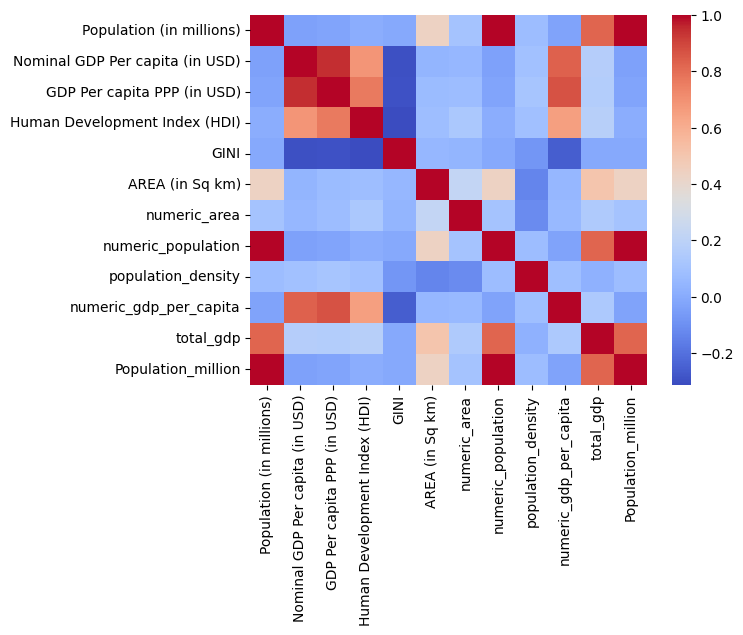

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
correlation_matrix = newData.corr(numeric_only= True)
sns.heatmap(correlation_matrix, annot=False, cmap="coolwarm")


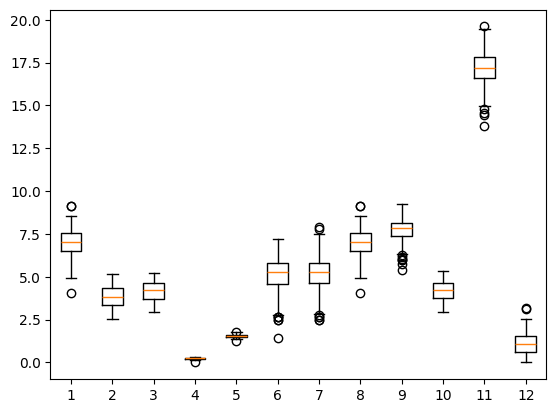

In [54]:
import numpy as np
plt.boxplot(np.log10(newData.select_dtypes(include=['number'])+1))
plt.show()

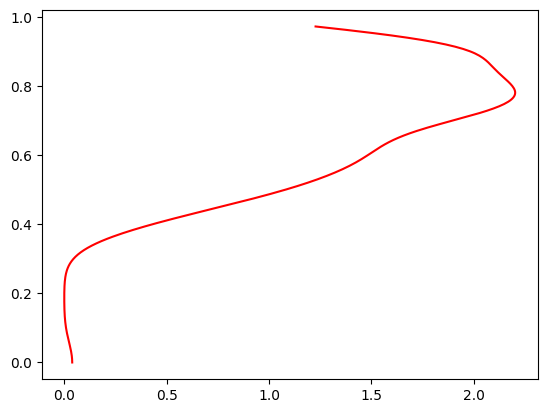

In [48]:
from scipy.stats import gaussian_kde

kde = gaussian_kde(newData['Human Development Index (HDI)'])
x_vals = np.linspace(min(newData['Human Development Index (HDI)']), max(newData['Human Development Index (HDI)']), 300)
plt.plot(kde(x_vals), x_vals, label='Smoothed (KDE)', color='red')
